In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
import os
import json
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style()
import pandas as pd

import jax
from jax import config
config.update("jax_enable_x64", True)
try:
    jax.devices()
except:
    config.update('jax_platforms','cpu')
    
sys.path.append(os.path.join(os.getcwd(),'../dysts/'))
import dysts
from dysts.datasets import *
from dysts.flows import *
from dysts.base import *
from dysts.utils import *
from dysts.analysis import *

# Darts implementation

# HS using local darts
sys.path.append(os.path.join(os.getcwd(),'../darts/'))
import darts
from darts.models import *
from darts import TimeSeries
import darts.models

import numpy as np
np.random.seed(0)

from copy import deepcopy

loaded!


[2024-09-13 13:22:07,713] WARNING | darts.models | Support for Facebook Prophet is not available. To enable it, install "darts", "u8darts[prophet]" or "u8darts[all]" (with pip);or "u8darts-all" (with conda).


# Fitting to the loaded chaotic system

In [3]:
input_path = "/app/dysts/dysts/data/train_univariate__pts_per_period_100__periods_12.json"
#input_path = os.getcwd() + "/../dysts/dysts/data/train_univariate__pts_per_period_100__periods_12_noise.json"
#input_path = os.getcwd() + "/../dysts/benchmarks/results/results_train_univariate__pts_per_period_100__periods_12_noise.json"

dataname = os.path.splitext(os.path.basename(os.path.split(input_path)[-1]))[0]
equation_data = load_file(input_path)    


hyperparameter_path = "/app/work/data/dysts_benchmarks/result/hyperparameters/220812_hyperparameters_" + dataname + ".json"
#220518_hyperparameters_
with open(hyperparameter_path, "r") as file:
    all_hyperparameters = json.load(file)

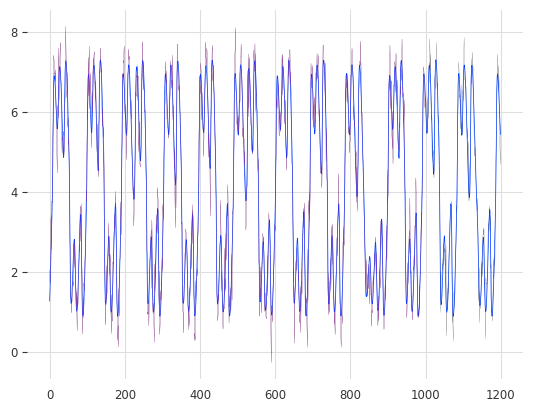

In [4]:
equation_name = "BeerRNN" 
# "Aizawa" 
# "Arneodo"
# "AnishchenkoAstakhov"
# "BelousovZhabotinsky"
# "BlinkingVortex"
# "CellularNeuralNetwork"
# "Chen"
# "Chua"
# "CircadianRhythm"
# "CoevolvingPredatorPrey"
# "Duffing"
# "Halvorsen"
# "HenonHeiles"
# "Lorenz"
# "PiecewiseCircuit"
# "Rossler"
# "Thomas"
# "Blasius"

# Error
# "GenesioTesi"

train_data = np.copy(np.array(equation_data.dataset[equation_name]["values"]))
train_data_noiseless = deepcopy(train_data)

#add noise
noise_scale = np.std(train_data[:int(5/6 * len(train_data))]) # prevent leakage
train_data += 0.2 * np.std(train_data) * np.random.normal(size=train_data.shape[0])
#train_data += 0.5 * np.std(train_data) * np.random.normal(size=train_data.shape[0])
      
split_point = int(5/6 * len(train_data))
y_train, y_val = train_data[:split_point], train_data[split_point:]
y_train_ts, y_test_ts = TimeSeries.from_dataframe(pd.DataFrame(train_data)).split_before(split_point)

    
plt.plot(train_data, lw=.1)
plt.plot(train_data_noiseless, lw=.5)
plt.plot(y_train, lw=.1)

In [4]:
y_train;

In [5]:
#RBF Takens

In [6]:
# # Fitting NLSS
# model_name = "RBF_Takens" #"LSS"##"NLSS_Sampling" #"LSS" #
# print(all_hyperparameters[equation_name][model_name])
# model_RBF = getattr(darts.models, model_name)(**all_hyperparameters[equation_name][model_name])
# model_RBF.fit(y_train_ts)

In [7]:
# # Predictiong by RBF
# tmp = model_RBF.predict(len(y_val))
# y_val_pred = {model_name: tmp}

# plt.plot(train_data, lw=.1)
# y_val_pred[model_name].plot(color="red", label="Prediction")

In [16]:
darts.models

<module 'darts.models' from '/app/work/../darts/darts/models/__init__.py'>

## LSS Takens

In [5]:
# Fitting LSS
model_name = "LSS_Takens"
model_LSS_Takens = getattr(darts.models, model_name)(**all_hyperparameters[equation_name][model_name])
model_LSS_Takens.fit(y_train_ts)

Dx = 10, Dz = 10
Iteration 1 - Log likelihood=-10016.3
Iteration 2 - Log likelihood=-8908.4
Iteration 3 - Log likelihood=-8360.4
Iteration 4 - Log likelihood=-8128.8
Iteration 5 - Log likelihood=-8039.2
Iteration 6 - Log likelihood=-8002.7


KeyboardInterrupt: 

In [9]:
# Predictiong by LSS
tmp = model_LSS_Takens.predict(len(y_val))
y_val_pred = {model_name: tmp} 

plt.plot(train_data, lw=.1)
y_val_pred[model_name].plot(color="red", label="Prediction")

## NLSS Takens

In [10]:
# Fitting NLSS
model_name = "NLSS_Takens" #"LSS"##"NLSS_Sampling" #"LSS" #
model_NLSS = getattr(darts.models, model_name)(**all_hyperparameters[equation_name][model_name])
model_NLSS.fit(y_train_ts)

Dx = 5, Dz = 5, Dk = 5
Iteration 1 - Log likelihood=-5264.7
Iteration 2 - Log likelihood=-4635.7
Iteration 3 - Log likelihood=-4308.7
Iteration 4 - Log likelihood=-4158.7
Iteration 5 - Log likelihood=-4092.9
Iteration 6 - Log likelihood=-4057.4
Iteration 7 - Log likelihood=-4038.3
Iteration 8 - Log likelihood=-4028.2
Iteration 9 - Log likelihood=-4022.3
Iteration 10 - Log likelihood=-4018.6
Iteration 11 - Log likelihood=-4016.0
Iteration 12 - Log likelihood=-4014.2
Iteration 13 - Log likelihood=-4012.9
Iteration 14 - Log likelihood=-4011.8
Iteration 15 - Log likelihood=-4010.9
Iteration 16 - Log likelihood=-4010.3
Iteration 17 - Log likelihood=-4009.7
Iteration 18 - Log likelihood=-4009.2
Iteration 19 - Log likelihood=-4008.7
Iteration 20 - Log likelihood=-4008.4
Iteration 21 - Log likelihood=-4008.0
Iteration 22 - Log likelihood=-4007.7
Iteration 23 - Log likelihood=-4007.4
Iteration 24 - Log likelihood=-4007.1
Iteration 25 - Log likelihood=-4006.9
Iteration 26 - Log likelihood=-4006.

In [11]:
# Predictiong by NLSS
tmp = model_NLSS.predict(len(y_val))
#tmp = model_NLSS.predict_noiseless(len(y_val))
#tmp = model_NLSS.predict_sample(len(y_val))
y_val_pred = {model_name: tmp}

plt.plot(train_data, lw=.1)
y_val_pred[model_name].plot(color="red", label="Prediction")

In [12]:
y_train[-1]

6.216167312942771

In [13]:
# # Predictiong by NLSS
# #tmp = model_NLSS.predict(len(y_val))
# tmp = model_NLSS.predict_noiseless(len(y_val))
# y_val_pred = {model_name: tmp}

# plt.plot(train_data, lw=.1)
# y_val_pred[model_name].plot(color="red", label="Prediction")

In [14]:
DIM = model_NLSS.ssm_emd.sm.Dk * (1 + 2*model_NLSS.ssm_emd.sm.Dz)
DIM

55

In [15]:
#y_val_pred["NLSS_Takens"]

In [16]:
# Saving data
#y_train_ts.to_pickle('y_train_ts.pkl')
y_train_ts.to_csv('y_train_ts.csv')

## ARIMA

In [17]:
#model_name = "KalmanForecaster"
model_name = "ARIMA"
model = getattr(darts.models, model_name)(**all_hyperparameters[equation_name][model_name])
model.fit(y_train_ts)

tmp = model.predict(len(y_val))
y_val_pred = {model_name: tmp} 
#y_val_pred[model_name] 

plt.plot(train_data, lw=.1)
y_val_pred[model_name].plot(color="red", label="Prediction")

In [18]:
model_name = "RNNModel"
model = getattr(darts.models, model_name)(**all_hyperparameters[equation_name][model_name])
model.fit(y_train_ts)

y_val_pred[model_name] = model.predict(len(y_val))

plt.plot(train_data, lw=.1)
y_val_pred[model_name].plot(color="red", label="Prediction")

/home/hideaki/anaconda3/envs/pnlss/lib/python3.10/site-packages/torch/random.py:159: UserWarning: CUDA reports that you have 2 available devices, and you have used fork_rng without explicitly specifying which devices are being used. For safety, we initialize *every* CUDA device by default, which can be quite slow if you have a lot of CUDAs. If you know that you are only making use of a few CUDA devices, set the environment variable CUDA_VISIBLE_DEVICES or the 'devices' keyword argument of fork_rng with the set of devices you are actually using. For example, if you are using CPU only, set device.upper()_VISIBLE_DEVICES= or devices=[]; if you are using device 0 only, set CUDA_VISIBLE_DEVICES=0 or devices=[0].  To initialize all devices and suppress this warning, set the 'devices' keyword argument to `range(torch.cuda.device_count())`.
  warnings.warn(message)
[2024-08-30 02:10:37,198] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is d

Epoch 0:   0%|          | 0/31 [00:00<?, ?it/s] 

/home/hideaki/anaconda3/envs/pnlss/lib/python3.10/site-packages/torch/__init__.py:747: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:431.)
  _C._set_default_tensor_type(t)


Epoch 199: 100%|██████████| 31/31 [00:00<00:00, 99.35it/s, loss=0.264, train_loss=0.263] 

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 199: 100%|██████████| 31/31 [00:00<00:00, 98.63it/s, loss=0.264, train_loss=0.263]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 17.51it/s]


In [19]:
## TransformerModel

In [20]:
model_name = "TransformerModel"
model = getattr(darts.models, model_name)(**all_hyperparameters[equation_name][model_name])
model.fit(y_train_ts)

y_val_pred[model_name] = model.predict(len(y_val))

plt.plot(train_data, lw=.1)
y_val_pred[model_name].plot(color="red", label="Prediction")

[2024-08-30 02:11:44,842] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
[2024-08-30 02:11:44,842] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
[2024-08

Epoch 99: 100%|██████████| 29/29 [00:00<00:00, 36.06it/s, loss=0.295, train_loss=0.249] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 29/29 [00:00<00:00, 35.95it/s, loss=0.295, train_loss=0.249]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]


## NBEATSModel

In [21]:
model_name = "NBEATSModel"
model = getattr(darts.models, model_name)(**all_hyperparameters[equation_name][model_name])
model.fit(y_train_ts)

y_val_pred[model_name] = model.predict(len(y_val))

plt.plot(train_data, lw=.1)
y_val_pred[model_name].plot(color="red", label="Prediction")

[2024-08-30 02:13:06,021] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
[2024-08-30 02:13:06,021] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
[2024-08

Epoch 99: 100%|██████████| 29/29 [00:01<00:00, 20.50it/s, loss=0.0537, train_loss=0.012]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 29/29 [00:01<00:00, 20.47it/s, loss=0.0537, train_loss=0.012]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting DataLoader 0: 100%|██████████| 1/1 [00:01<00:00,  1.46s/it]


# Plot

In [22]:
model_names = ['ARIMA','RNNModel','TransformerModel','NBEATSModel','NLSS_Takens']
#model_names = ['RNNModel','TransformerModel','NBEATSModel','NLSS_Takens']
#model_names = ['ARIMA','RNNModel','NBEATSModel','NLSS_Takens']

i = 1
for model_name in model_names:
    plt.subplot(len(model_names),1,i)
    
    
    plt.plot(train_data_noiseless, lw = .2)
    plt.plot(y_train, lw = .2)
    
    if model_name == 'NLSS_Takens':
        y_val_pred[model_name].plot(label=model_name, color='red') #
        plt.legend(loc='upper left')
    else:
        ax = y_val_pred[model_name].plot(xticks=[], color='blue', label=model_name)
        plt.legend(loc='upper left')
        plt.xlabel('')    

    plt.xlim([600, 1200]) 
    #plt.ylim([-2, 2]) 
    
    if i == 1:
        plt.title(f'{equation_name}')
        
        
    i = i + 1



KeyError: 'NLSS_Takens'

# MISC

In [ ]:
y_val_pred[model_name]

In [ ]:
model_name = "NBEATSModel"
model = getattr(darts.models, model_name)(**all_hyperparameters[equation_name][model_name])
